In [63]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import yfinance as yf
import matplotlib.pyplot as plt 

In [22]:
AAPL = yf.Ticker('AAPl')
AAPL = AAPL.history(start = '2017-01-01', end = '2022-07-01')
print(f'full data\n', AAPL.tail())
print(f'close price\n', AAPL.Close.tail())
print(f'Open and Close price\n', AAPL[['Open', 'Close']].tail())


full data
                   Open        High  ...  Dividends  Stock Splits
Date                                ...                         
2022-06-24  139.899994  141.910004  ...        0.0           0.0
2022-06-27  142.699997  143.490005  ...        0.0           0.0
2022-06-28  142.130005  143.419998  ...        0.0           0.0
2022-06-29  137.460007  140.669998  ...        0.0           0.0
2022-06-30  137.250000  138.369995  ...        0.0           0.0

[5 rows x 7 columns]
close price
 Date
2022-06-24    141.660004
2022-06-27    141.660004
2022-06-28    137.440002
2022-06-29    139.229996
2022-06-30    136.720001
Name: Close, dtype: float64
Open and Close price
                   Open       Close
Date                              
2022-06-24  139.899994  141.660004
2022-06-27  142.699997  141.660004
2022-06-28  142.130005  137.440002
2022-06-29  137.460007  139.229996
2022-06-30  137.250000  136.720001


In [41]:
AAPL.loc['2022-06-06',['Close']]
AAPL.iloc[:,0].head() ## last data
AAPL[(AAPL.Close > 110) & (AAPL.Open < 109)].head() ## conditional

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-25,107.285532,111.253209,106.533552,111.094894,149981400,0.0,0.0


Add and Revise datas

In [43]:
## How to add datas
s2 = pd.date_range("2022-07-02", periods = 7)
print(s2)
s3 = pd.date_range('2022-07-02', '2022-07-03', freq = 'H') ##(from, to, freq = 'H), H denotes for hours
print(s3)

DatetimeIndex(['2022-07-02', '2022-07-03', '2022-07-04', '2022-07-05',
               '2022-07-06', '2022-07-07', '2022-07-08'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-07-02 00:00:00', '2022-07-02 01:00:00',
               '2022-07-02 02:00:00', '2022-07-02 03:00:00',
               '2022-07-02 04:00:00', '2022-07-02 05:00:00',
               '2022-07-02 06:00:00', '2022-07-02 07:00:00',
               '2022-07-02 08:00:00', '2022-07-02 09:00:00',
               '2022-07-02 10:00:00', '2022-07-02 11:00:00',
               '2022-07-02 12:00:00', '2022-07-02 13:00:00',
               '2022-07-02 14:00:00', '2022-07-02 15:00:00',
               '2022-07-02 16:00:00', '2022-07-02 17:00:00',
               '2022-07-02 18:00:00', '2022-07-02 19:00:00',
               '2022-07-02 20:00:00', '2022-07-02 21:00:00',
               '2022-07-02 22:00:00', '2022-07-02 23:00:00',
               '2022-07-03 00:00:00'],
              dtype='datetime64[ns]', freq='H')


In [59]:
## How to revise datas
AAPL.columns = ['Date', 'Open', 'High', 'Close', 'Volume', 'NaN1', 'NaN2']
print(AAPL)
AAPL.Open = AAPL.Open.apply(lambda x: x + 1) ## every number of Open will increae by 1
print(AAPL.Open)

                  Date        Open        High  ...     Volume  NaN1  NaN2
Date                                            ...                       
2017-01-03   27.175506   29.257643   26.931443  ...  115127600   0.0   0.0
2017-01-04   27.187240   29.227135   27.163773  ...   84472400   0.0   0.0
2017-01-05   27.203670   29.365597   27.177855  ...   88774400   0.0   0.0
2017-01-06   27.405486   29.670671   27.332737  ...  127007600   0.0   0.0
2017-01-09   27.680058   29.924122   27.677713  ...  134247600   0.0   0.0
...                ...         ...         ...  ...        ...   ...   ...
2022-06-24  139.899994  143.660004  139.770004  ...   89116800   0.0   0.0
2022-06-27  142.699997  143.660004  140.970001  ...   70207900   0.0   0.0
2022-06-28  142.130005  139.440002  137.320007  ...   67083400   0.0   0.0
2022-06-29  137.460007  141.229996  136.669998  ...   66242400   0.0   0.0
2022-06-30  137.250000  138.720001  133.770004  ...   98964500   0.0   0.0

[1383 rows x 7 columns]


In [62]:
## How to delete data
AAPL.drop('NaN2', axis = 1).head()
AAPL.drop(['NaN2', 'NaN1'], axis = 1).head()


,Date,Open,High,Close,Volume
Date,,,,,
2017-01-03,27.175506,30.257643,26.931443,27.257643,115127600
2017-01-04,27.187240,30.227135,27.163773,27.227135,84472400
2017-01-05,27.203670,30.365597,27.177855,27.365597,88774400
2017-01-06,27.405486,30.670671,27.332737,27.670671,127007600
2017-01-09,27.680058,30.924122,27.677713,27.924122,134247600


<AxesSubplot:title={'center':'Stock price of AAPL'}, xlabel='Date', ylabel='Price'>

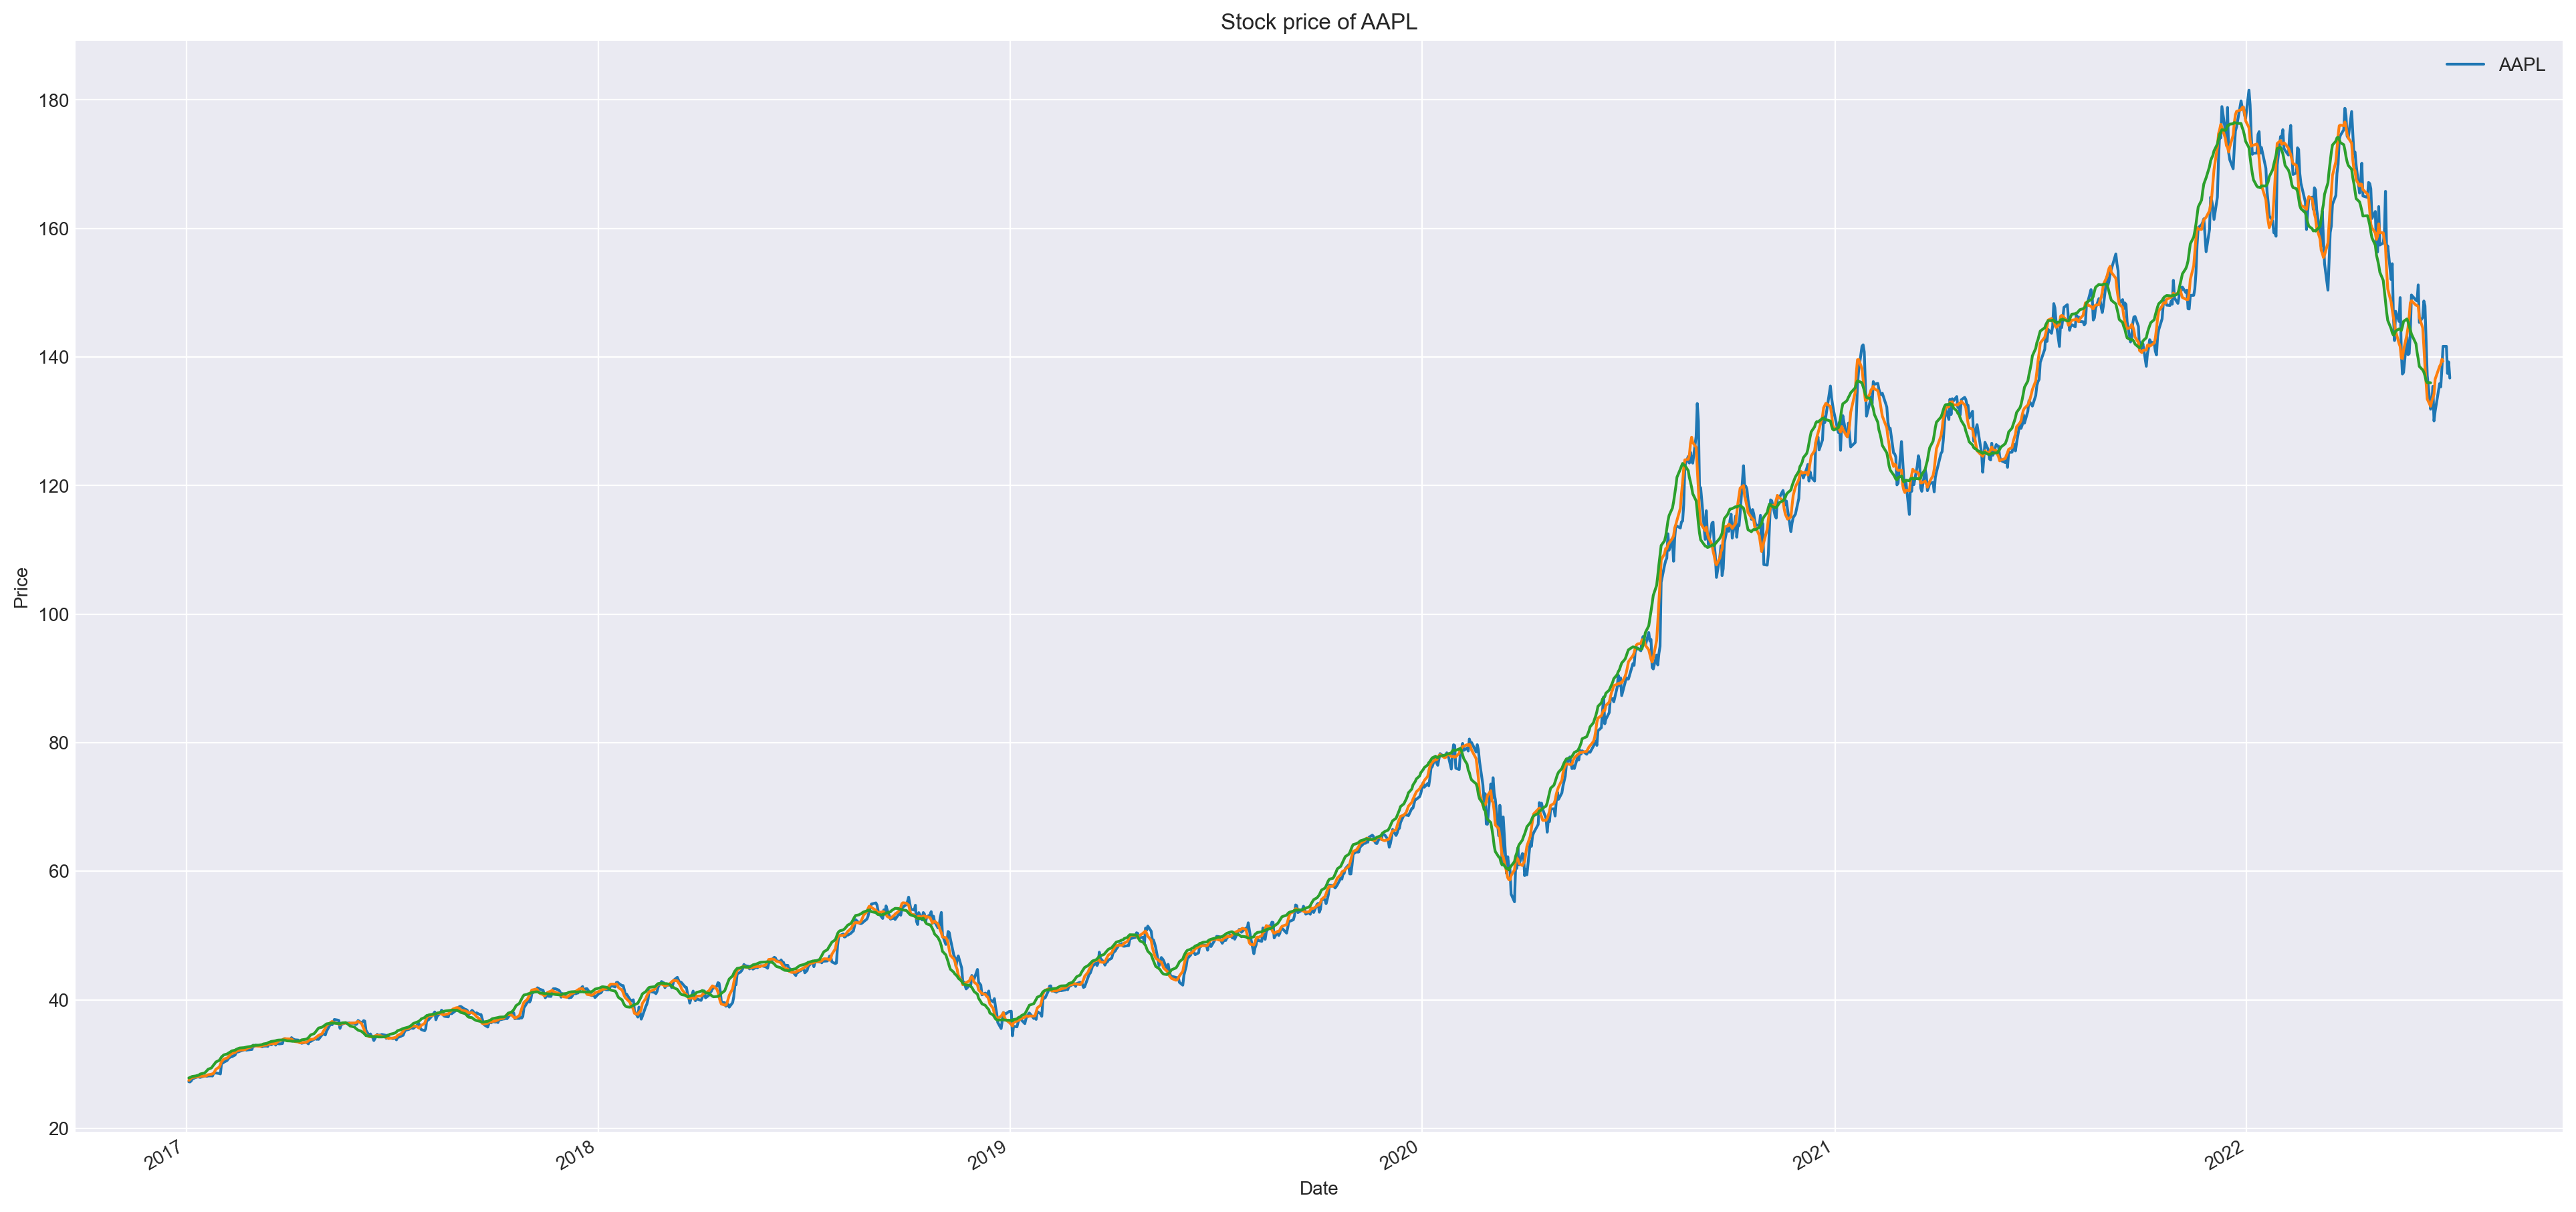

In [87]:
from matplotlib.pyplot import figure
plt.style.use('seaborn-darkgrid')
plt.plot(AAPL.Close)
plt.title("Stock price of AAPL")
plt.legend(['AAPL'])
plt.xlabel('time')
plt.ylabel('Price')
plt.rc('figure', figsize = (24, 12), dpi = 200)
AAPL[::-1].Close.rolling(5).mean().plot()
AAPL[::-1].Close.rolling(13).mean().plot()

Date
2017-01-03         NaN
2017-01-04   -0.001119
2017-01-05    0.005085
2017-01-06    0.011148
2017-01-09    0.009160
                ...   
2022-06-24    0.024517
2022-06-27    0.000000
2022-06-28   -0.029790
2022-06-29    0.013024
2022-06-30   -0.018028
Name: Close, Length: 1383, dtype: float64


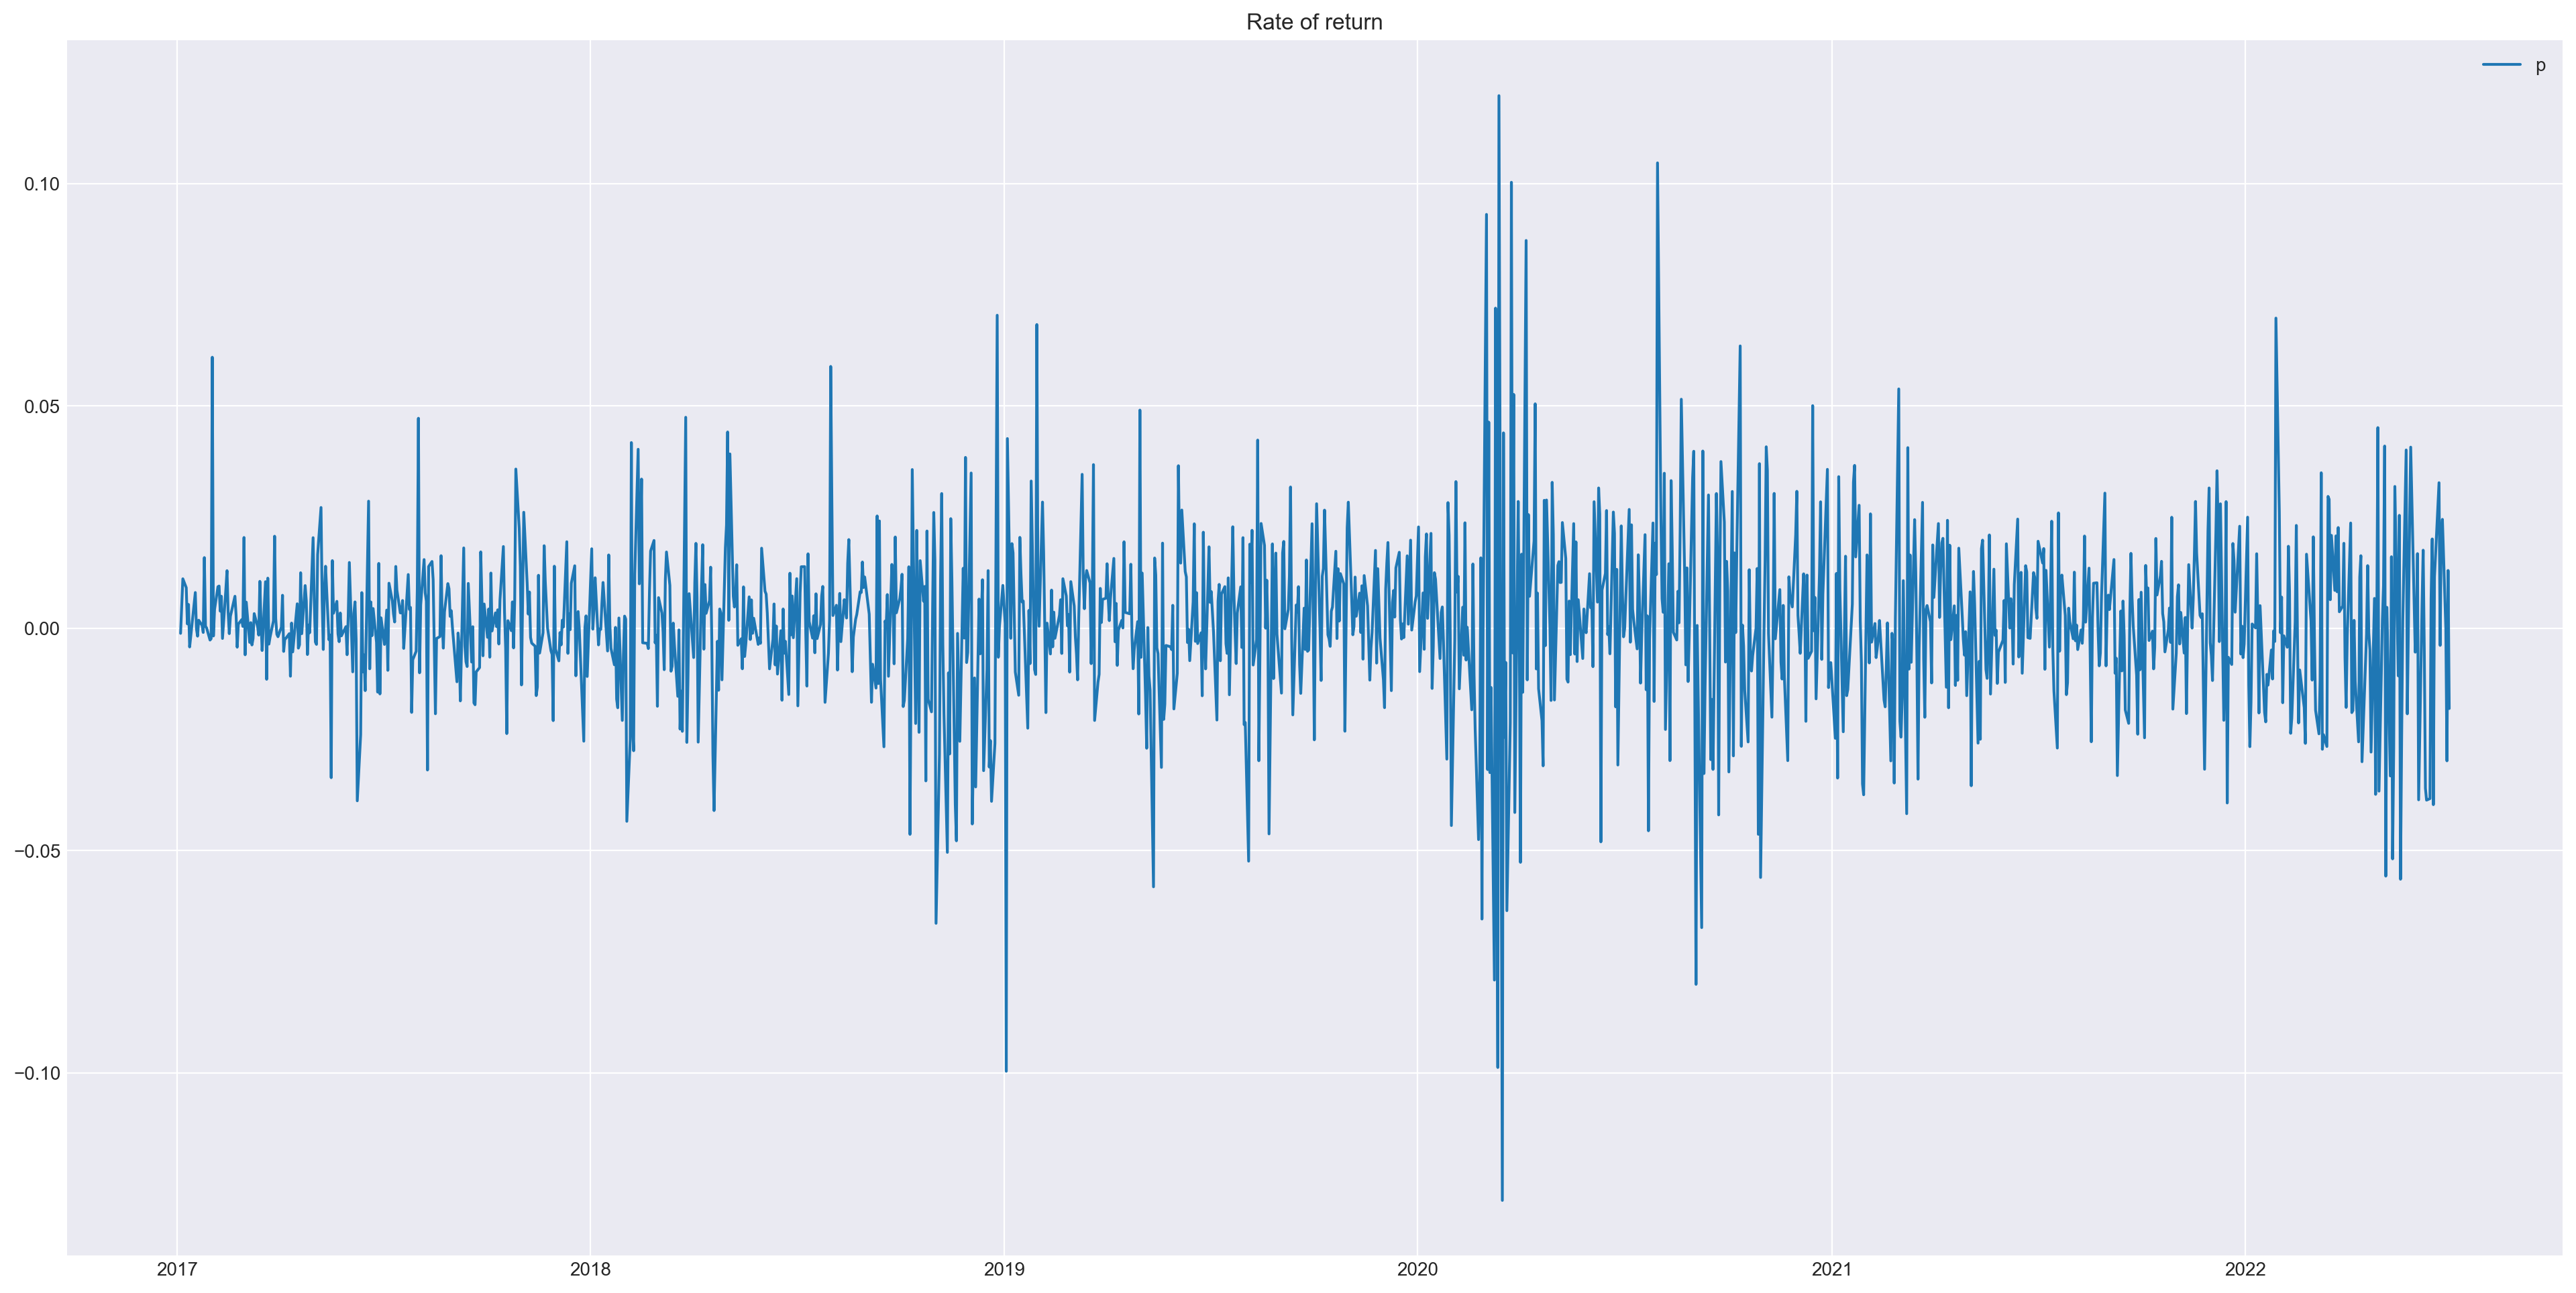

In [83]:
## Calculate rate of return
Return = AAPL.Close.pct_change()
print(Return)
plt.plot(Return)
plt.title('Rate of return')
plt.legend('percenatge')
